In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(0)

In [3]:
from sklearn.dummy import DummyRegressor

from sklearn.model_selection import cross_val_score,KFold
from sklearn.metrics import mean_absolute_error

import scikitplot as skplt

from datetime import datetime

import xgboost as xgb

import lightgbm as lgb

from functools import partial
from hyperopt import hp, fmin, tpe, STATUS_OK, Trials

In [4]:
train = pd.read_hdf(r'C:\Users\Seba\Documents\python\datasets-pyth\realstate\train.realestate.h5')

In [5]:
train.head()

,parking,apartament,surroundings,extra_description,benefit_investment,broker_license,broker_id,broker_company_id,building_num_floor,type_building,...,apartament_bahtroom_condition,apartament_installation_condition,apartament_window,apartament_appartament,stats_who,stats_market,stats_created_at,stats_updated_at,stats_viewers,stats_who_cat
0,garaż,"{'Łazienka': 'w aneksie', 'Liczba pokoi': 'par...",{'Zdrowie': [' ...,[OSTATNIE WOLNE LOKALE !!!!!!!!!! OSIED...,NaN,,0,0,3,apartamentowiec,...,-1,nowa,nowe plastikowe,"północno-zachodnie, południowo-wschodnie",osoba prywatna,wtórny,więcej niż miesiąc temu,dzisiaj,2596,0
0,NaN,"{'Liczba pokoi': '8', 'Kuchnia': 'bardzo dobry...",{'Zdrowie': [' ...,[Mieszkanie typu studio na warszawskiej Ochoci...,NaN,,1,1,8,apartamentowiec,...,-1,-1,-1,-1,biuro nieruchomości,wtórny,w tym miesiącu,wczoraj,213,1
0,NaN,"{'Łazienka': 'z oknem, oddzielna', 'Liczba pok...",{'Zdrowie': [' ...,"[Oferujemy mieszkanie na 3 piętrze, dwustronne...",NaN,,2,0,4,blok,...,do odnowienia,częściowo wymieniona,nowe plastikowe,"wschodnie, zachodnie",osoba prywatna,wtórny,w ciągu ostatnich dwóch tygodni,w ciągu ostatnich dwóch tygodni,436,0
0,NaN,"{'Liczba pokoi': 'parter', 'Kuchnia': 'do remo...",{},"[Witam, oferuję Państwu mieszkanie na spokojny...",NaN,Nr licencji pośrednika: 11710,3,2,4,blok,...,-1,-1,-1,-1,biuro nieruchomości,wtórny,więcej niż miesiąc temu,w tym tygodniu,122,1
0,NaN,"{'Liczba pokoi': '3', 'Kuchnia': '3', 'Forma w...",{'Zdrowie': [' ...,[Jeśli chcesz mieszkać w doskonale skomunikowa...,NaN,,4,3,3,blok,...,-1,-1,-1,-1,biuro nieruchomości,wtórny,więcej niż miesiąc temu,wczoraj,1152,1


In [6]:
train = train.reset_index()
train.drop('index',axis=1,inplace=True)

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19144 entries, 0 to 19143
Data columns (total 51 columns):
parking                                  6854 non-null object
apartament                               18874 non-null object
surroundings                             19144 non-null object
extra_description                        16732 non-null object
benefit_investment                       1383 non-null object
broker_license                           19144 non-null object
broker_id                                19144 non-null int16
broker_company_id                        19144 non-null int16
building_num_floor                       19144 non-null int64
type_building                            19144 non-null object
year_building                            19144 non-null int64
material_building                        19144 non-null object
benefit_patio                            19144 non-null int64
benefit_winda                            19144 non-null int64
benefit_loft     

In [7]:
for column in train.columns :
    if column not in ['apartament','surroundings']:
        print(column)
        print('')
        print(train[column].value_counts(normalize=True))
        print('')

parking

garaż                                                                          0.387073
parking podziemny                                                              0.156405
miejsce parkingowe                                                             0.149402
brak                                                                           0.128246
miejsce parkingowe, parking podziemny                                          0.049606
garaż, miejsce parkingowe, parking podziemny                                   0.027867
parking strzeżony                                                              0.024365
garaż, miejsce parkingowe                                                      0.015611
płatny dodatkowo                                                               0.012402
parking podziemny, płatny dodatkowo                                            0.012402
możliwość wynajęcia                                                            0.010943
parking podziemny, brak

{'Kuchnia': 'w aneksie', 'Powierzchnia': '82,91 m', 'Liczba pokoi': '4', 'Piętro': '2'}                                                                                                                                                            0.000795
{'Kuchnia': 'w aneksie', 'Powierzchnia': '82,90 m', 'Liczba pokoi': '4', 'Piętro': '2'}                                                                                                                                                            0.000742
{'Kuchnia': 'w aneksie', 'Powierzchnia': '56,65 m', 'Liczba pokoi': '3', 'Piętro': '1'}                                                                                                                                                            0.000636
{'Kuchnia': 'w aneksie', 'Powierzchnia': '58,12 m', 'Liczba pokoi': '3', 'Piętro': '1'}                                                                                                                                                            0

In [51]:
df_modified['year_building'].value_counts(normalize=True).head(20)

-1       0.243679
 2000    0.040274
 2008    0.033483
 2006    0.028573
 2009    0.027737
 2001    0.027633
 2005    0.022723
 2016    0.022670
 2010    0.022461
 2007    0.021939
 2018    0.020581
 2003    0.019536
 2004    0.016820
 2002    0.016611
 2017    0.015880
 1936    0.014783
 1950    0.014469
 2015    0.014417
 1999    0.013842
 1980    0.013842
Name: year_building, dtype: float64

In [58]:
get_feats(df_modified)

['broker_id',
 'broker_company_id',
 'building_num_floor',
 'type_building',
 'year_building',
 'material_building',
 'benefit_patio',
 'benefit_winda',
 'benefit_loft',
 'benefit_wideofon',
 'benefit_tv_kablowa',
 'benefit_recepcja',
 'benefit_centralne_ogrzewanie',
 'benefit_ogrzewanie_miejskie',
 'benefit_internet',
 'benefit_ogrzewanie_elektryczne',
 'benefit_teren_ogrodzony',
 'benefit_podjazd_dla_niepełnosprawnych',
 'benefit_ochrona',
 'benefit_telefon',
 'benefit_ogrzewanie_podłogowe',
 'benefit_antresola',
 'benefit_domofon',
 'apartament_area',
 'apartament_num_rooms',
 'stats_viewers',
 'stats_who_cat',
 'garaż',
 'parking podziemny',
 'miejsce parkingowe',
 'brak',
 'powierzchnia']

In [78]:
def get_feats(df):
    feats = df.select_dtypes(include=[np.number,np.bool]).columns
    
    return [feat for feat in feats if feat not in ['price'] ]
    
def parking_feats(x,feat):
    
    if feat in x:
        return 1
    elif x== '-1':
        return -1
    else:
        return 0
    
def prepare_feat(x,feat):
    if type(x) != dict:
        return -1
    else:
        if feat in x.keys():
            return x[feat]
        else:
            return -1

    
def feature_engineering(df):
    
    df_modified = train.fillna(-1)
    
    df_modified['garaż'] = df_modified['parking'].apply(lambda x: parking_feats(str(x),'garaż') )
    df_modified['parking podziemny'] = df_modified['parking'].apply(lambda x: parking_feats(str(x),'parking podziemny') )
    df_modified['miejsce parkingowe'] = df_modified['parking'].apply(lambda x: parking_feats(str(x),'miejsce parkingowe') )
    df_modified['brak'] = df_modified['parking'].apply(lambda x: parking_feats(str(x),'brak') )
    
    
    df_modified.loc[2421,'apartment_area'] = -1
    df_modified.loc[15411,'apartment_area'] = -1
    
    
    df_modified['type_building'] = df_modified['type_building'].factorize()[0]
    df_modified['apartament_ownership'] = df_modified['apartament_ownership'].factorize()[0]
    
    df_modified['apartament_num_levels'] = df_modified['apartament_num_levels'].factorize()[0]
    #cechy pogarnaszjące jakość modelu:
    #df_modified['material_building'] = df_modified['material_building'].factorize()[0]
    
    #df_modified['liczba_pokoi'] = df_modified['apartament'].apply(lambda x: prepare_feat(x,'Liczba pokoi'))
    #df_modified[df_modified['liczba_pokoi']=='parter'] =-1
    #df_modified[df_modified['liczba_pokoi']=='poddasze'] =-1
    #df_modified[df_modified['liczba_pokoi']=='powyżej 30'] =30
    #df_modified['liczba_pokoi'] = df_modified['liczba_pokoi'].apply(lambda x: int(x))
    
    
    
    
    
    
    
    
    
    
    
    return df_modified

df_modified = feature_engineering(train)

In [45]:
def run_cv(model,df, cv=5):
    feats = get_feats(df)
    X = df[feats].values
    y = df['price'].values

    scores = cross_val_score(model, X, y, cv=cv, scoring='neg_mean_absolute_error')
    scores = np.abs(scores)

    skplt.estimators.plot_learning_curve(model, X, y, title='Learning Curve',figsize=(15, 5), cv=cv, scoring='neg_mean_absolute_error')
    return np.mean(scores), np.std(scores)

(1407658.9787633833, 838508.7751918916)

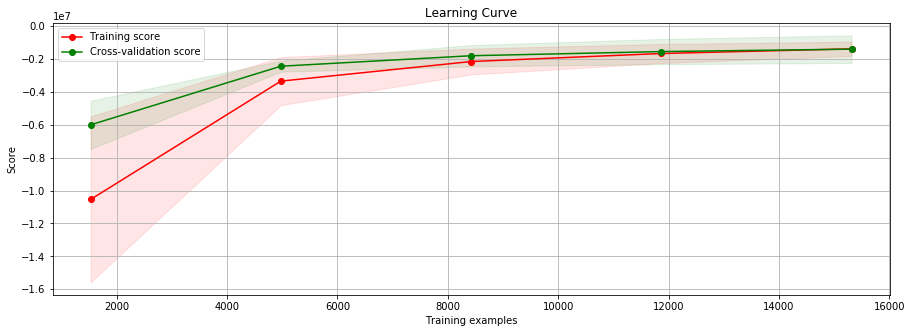

In [29]:
train_fillna = train.fillna(-1)
run_cv(DummyRegressor(),train_fillna)

(2058256.283620856, 612268.1760446025)

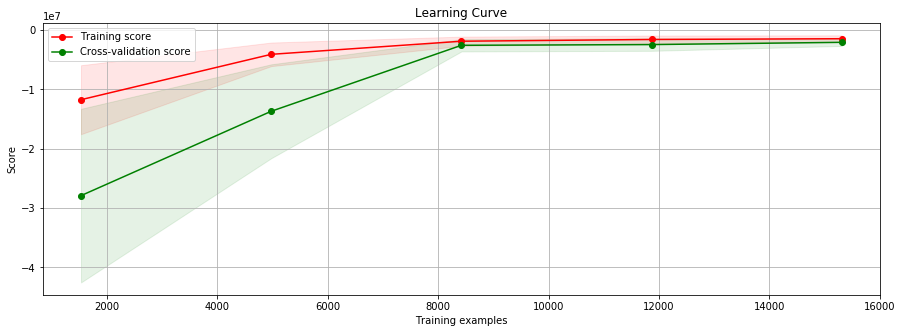

In [230]:
run_cv(lgb.LGBMRegressor(),train_fillna)

(1590156.3452988586, 892615.6958193259)

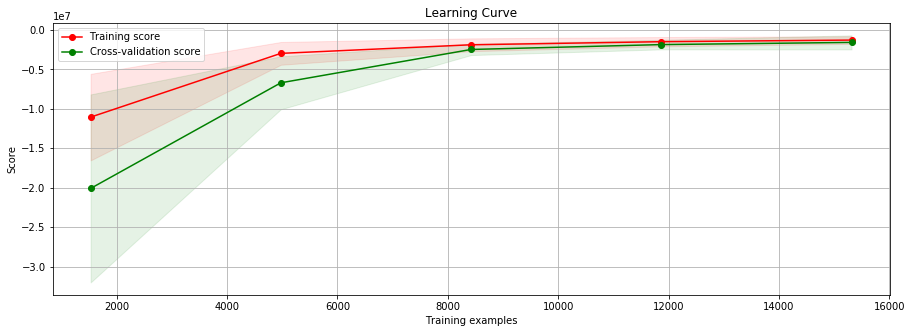

In [75]:
run_cv(lgb.LGBMRegressor(random_state=0),df_modified)

(1798257.2478523694, 740522.9219859843)

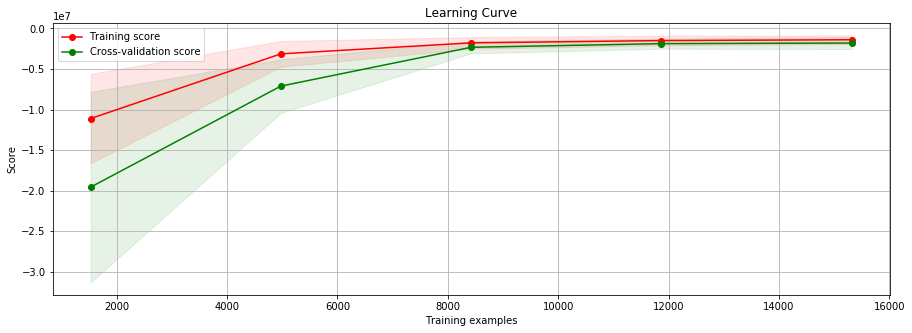

In [79]:
run_cv(lgb.LGBMRegressor(random_state=0),df_modified)